# LBP 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio

from skimage import feature

In [ ]:
def lbp_features(img, radius=1, sampling_pixels=8):
    
    # LBP operates in single channel images so if RGB images are provided
    # we have to convert it to grayscale
    if (len(img.shape) > 2):
        img = img.astype(float)
        # RGB to grayscale convertion using Luminance
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11

    # converting to uint8 type for 256 graylevels
    img = img.astype(np.uint8)
    
    # normalize values can also help improving description
    i_min = np.min(img)
    i_max = np.max(img)
    if (i_max - i_min != 0):
        img = (img - i_min)/(i_max-i_min)
    
    # compute LBP
    lbp = feature.local_binary_pattern(img, sampling_pixels, radius, method="uniform")
    
    # LBP returns a matrix with the codes, so we compute the histogram
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels + 3), range=(0, sampling_pixels + 2))

    # normalization
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns
    return hist

def Euclidean_distance(p, q):
    dist = np.sqrt(np.sum(np.square(p-q)))
    return dist

In [ ]:
img1 = imageio.imread("/content/drive/MyDrive/ASD/autistic120.jpg")
img2 = imageio.imread("/content/drive/MyDrive/ASD/autistic48 (2).jpg")
img3 = imageio.imread("/content/drive/MyDrive/ASD/autistic121.jpg")
img4 = imageio.imread("/content/drive/MyDrive/ASD/normal12.jpg")
img5 = imageio.imread("/content/drive/MyDrive/ASD/normal13.jpg")
img6 = imageio.imread("/content/drive/MyDrive/ASD/normal13 (2).jpg")

lbp1 = lbp_features(img1,3,16)
lbp2 = lbp_features(img2,3,16)
lbp3 = lbp_features(img3,3,16)
lbp4 = lbp_features(img4,3,16)
lbp5 = lbp_features(img5,3,16)
lbp6 = lbp_features(img6,3,16)

dQ2_H = Euclidean_distance(lbp1, lbp2)
dQ3_H = Euclidean_distance(lbp1, lbp3)
dQ4_H = Euclidean_distance(lbp1, lbp4)
dQ5_H = Euclidean_distance(lbp1, lbp5)
dQ6_H = Euclidean_distance(lbp1, lbp6)

Text(0.5, 1.0, 'Rank 5 : 0.0327')

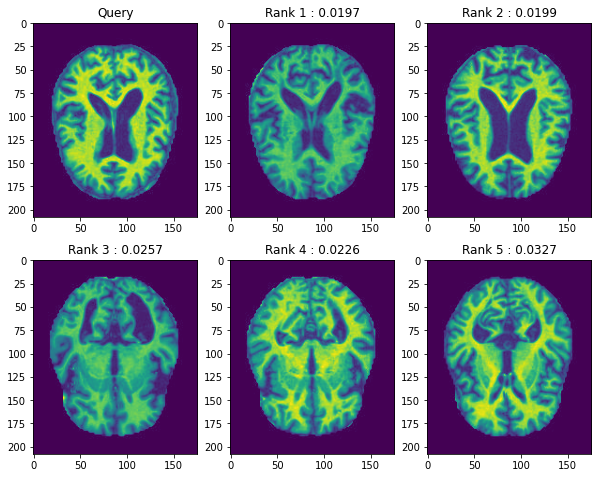

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(231); plt.imshow(img1); plt.title('Query')
plt.subplot(232); plt.imshow(img3); plt.title('Rank 1 : %.4f' % dQ3_H)
plt.subplot(233); plt.imshow(img2); plt.title('Rank 2 : %.4f' % dQ2_H)
plt.subplot(234); plt.imshow(img4); plt.title('Rank 3 : %.4f' % dQ4_H)
plt.subplot(235); plt.imshow(img5); plt.title('Rank 4 : %.4f' % dQ5_H)
plt.subplot(236); plt.imshow(img6); plt.title('Rank 5 : %.4f' % dQ6_H)